In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.transforms import Affine2D
from matplotlib.ticker import MultipleLocator
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator, DictFormatter)
import matplotlib.patheffects as path_effects
import matplotlib.cm as cm
from PIL import Image, ImageEnhance

import numpy as np
import highlight_text as htext
import adjustText


In [2]:
# Load the data
df = pd.read_csv("Data\\BL22_23_passing.csv")
df.head(10)

,player,nation,pos,squad,born,90s,total_cmp,total_att,total_cmp%,total_totdist,...,xa,a-xag,kp,1/3,ppa,crspa,prgp,season,competition,age_years
0,Aaron Zehnter,de GER,DF,Augsburg,2004-01-01,0.0,0,2,0.0,0,...,0.0,0.0,0,0,0,0,0,2022-2023,DEU Bundesliga 1,17.0
1,Aarón Martín,es ESP,DF,Mainz 05,1997-01-01,20.5,761,1028,74.0,12672,...,3.4,0.2,27,68,29,16,86,2022-2023,DEU Bundesliga 1,25.0
2,Abdou Diallo,sn SEN,"DF,MF",RB Leipzig,1996-01-01,5.3,323,381,84.8,6092,...,0.3,-0.1,1,25,4,0,24,2022-2023,DEU Bundesliga 1,26.0
3,Adam Hložek,cz CZE,"FW,MF",Leverkusen,2002-01-01,14.3,241,332,72.6,3525,...,1.3,0.5,18,21,6,0,32,2022-2023,DEU Bundesliga 1,20.0
4,Agustín Rogel,uy URU,DF,Hertha BSC,1997-01-01,15.8,426,572,74.5,8612,...,0.1,1.0,1,11,0,0,23,2022-2023,DEU Bundesliga 1,24.0
5,Alassane Pléa,fr FRA,FW,M'Gladbach,1993-01-01,19.7,529,763,69.3,8211,...,5.3,5.0,32,72,34,7,94,2022-2023,DEU Bundesliga 1,29.0
6,Alex Král,cz CZE,MF,Schalke 04,1998-01-01,26.2,586,847,69.2,10138,...,1.8,-0.7,11,73,16,5,100,2022-2023,DEU Bundesliga 1,24.0
7,Alexander Hack,de GER,DF,Mainz 05,1993-01-01,12.6,430,586,73.4,9125,...,0.8,-0.1,4,35,4,1,52,2022-2023,DEU Bundesliga 1,28.0
8,Alexander Meyer,de GER,GK,Dortmund,1991-01-01,7.0,280,323,86.7,6953,...,0.0,0.0,0,4,0,0,1,2022-2023,DEU Bundesliga 1,31.0
9,Alexander Schwolow,de GER,GK,Schalke 04,1992-01-01,22.6,567,853,66.5,18860,...,0.2,-0.1,1,32,2,0,0,2022-2023,DEU Bundesliga 1,30.0


In [3]:
# Calculate Progressive Passes and Passes to penalty area per game
df['prppg'] = round(df['prgp']/df['90s'], 2)

df['ppapg'] = round(df['ppa']/df['90s'], 2)

In [4]:
# Filter player with at least 10 games and exluded goal keepers
df = df[(df['90s'] >= 10) & (df['pos'] != 'GK')]

In [5]:
df.head()

,player,nation,pos,squad,born,90s,total_cmp,total_att,total_cmp%,total_totdist,...,kp,1/3,ppa,crspa,prgp,season,competition,age_years,prppg,ppapg
1,Aarón Martín,es ESP,DF,Mainz 05,1997-01-01,20.5,761,1028,74.0,12672,...,27,68,29,16,86,2022-2023,DEU Bundesliga 1,25.0,4.20,1.41
3,Adam Hložek,cz CZE,"FW,MF",Leverkusen,2002-01-01,14.3,241,332,72.6,3525,...,18,21,6,0,32,2022-2023,DEU Bundesliga 1,20.0,2.24,0.42
4,Agustín Rogel,uy URU,DF,Hertha BSC,1997-01-01,15.8,426,572,74.5,8612,...,1,11,0,0,23,2022-2023,DEU Bundesliga 1,24.0,1.46,0.00
5,Alassane Pléa,fr FRA,FW,M'Gladbach,1993-01-01,19.7,529,763,69.3,8211,...,32,72,34,7,94,2022-2023,DEU Bundesliga 1,29.0,4.77,1.73
6,Alex Král,cz CZE,MF,Schalke 04,1998-01-01,26.2,586,847,69.2,10138,...,11,73,16,5,100,2022-2023,DEU Bundesliga 1,24.0,3.82,0.61


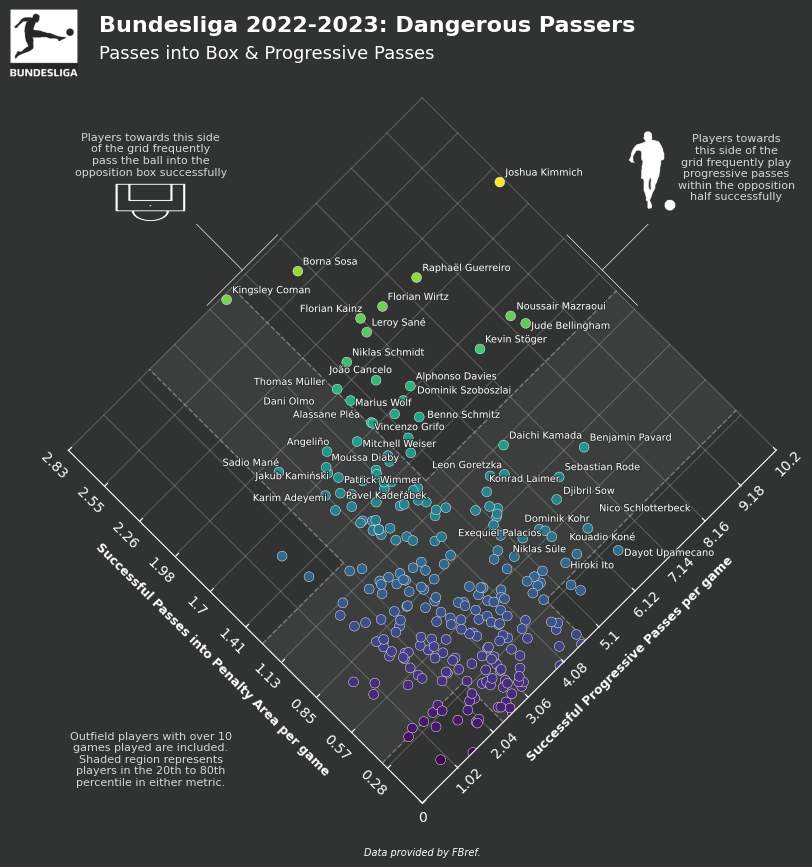

In [6]:
# This plot is based on guidance from @jakeyk11
# %% Plot formatting

# Set the color of the X-axis and Y-axis tick labels 
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.color'] = 'w'
mpl.rcParams['text.color'] = 'w'

# Plotting metrics
left_metric = 'ppapg'
right_metric = 'prppg'
left_ax_plot = df[left_metric]
right_ax_plot = df[right_metric]

left_ax_plot.replace(np.nan, 0, inplace=True)
right_ax_plot.replace(np.nan, 0, inplace=True)

# Normalize the axis values to range [0, 0.99]
left_ax_norm_plot = 0.99 * left_ax_plot / max(left_ax_plot)
right_ax_norm_plot = 0.99 * right_ax_plot / max(right_ax_plot)

# Calculate the quantiles (0.2, 0.5, and 0.8)
left_ax_quantile = left_ax_norm_plot.quantile([0.2,0.5,0.8]).tolist()
right_ax_quantile = right_ax_norm_plot.quantile([0.2,0.5,0.8]).tolist()

# Calculate the quantiles (0, 0.5, and 0.9)
plot_quantile_left = left_ax_norm_plot.quantile([0,0.5,0.9]).tolist()
plot_quantile_right = right_ax_norm_plot.quantile([0,0.5,0.9]).tolist()

# Filter players with quantile > 0.9
plot_player = df[(left_ax_norm_plot>plot_quantile_left[2]) | (right_ax_norm_plot>plot_quantile_right[2])]


# Set-up figure
fig = plt.figure(figsize = (8.5,9), facecolor = '#313332')

# Set up diamond axis extent
left_extent = 1.001
right_extent = 1.001
plot_extents = 0, right_extent, 0, left_extent

# Create reference dictionary for ticks
ticks = list(np.arange(0, 1.1, 0.1))
right_dict = {}
left_dict = {}

for i in ticks:
    if i == 0:
        left_dict[i] = ''
        right_dict[i] =  ''
    else:
        left_dict[i] = str(round((i * left_ax_plot.max())/0.99,2))
        right_dict[i] = str(round((i * right_ax_plot.max())/0.99,2))
    
tick_formatter1 = DictFormatter(right_dict)
tick_formatter2 = DictFormatter(left_dict)

# Define axis transformation, build axis and auxillary axis
transform = Affine2D().rotate_deg(45)
helper = floating_axes.GridHelperCurveLinear(transform, plot_extents,
                                             grid_locator1=MaxNLocator(nbins=1+right_extent/0.1), 
                                             grid_locator2=MaxNLocator(nbins=1+left_extent/0.1),
                                             tick_formatter1=tick_formatter1, 
                                             tick_formatter2=tick_formatter2)

ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=helper)
ax.patch.set_alpha(0)
ax.set_position([0.075,0.07,0.85,0.8], which='both')
aux_ax = ax.get_aux_axes(transform)

# Add transformed axis
ax = fig.add_axes(ax)
aux_ax.patch = ax.patch 

# Format axes
ax.axis['left'].line.set_color("w")
ax.axis['bottom'].line.set_color("w")
ax.axis['right'].set_visible(False)
ax.axis['top'].set_visible(False)
ax.axis['left'].major_ticklabels.set_rotation(0)
ax.axis['left'].major_ticklabels.set_horizontalalignment("center")

# Label axes
ax.axis['left'].set_label("Successful Passes into Penalty Area per game")
ax.axis['left'].label.set_rotation(0)
ax.axis['left'].label.set_color("w")
ax.axis['left'].label.set_fontweight("bold")
ax.axis['left'].label.set_fontsize(9)
ax.axis['left'].LABELPAD += 7

ax.axis['bottom'].set_label("Successful Progressive Passes per game")
ax.axis['bottom'].label.set_color("w")
ax.axis['bottom'].label.set_fontweight("bold")
ax.axis['bottom'].label.set_fontsize(9)
ax.axis['bottom'].LABELPAD += 7
ax.axis['bottom'].major_ticklabels.set_pad(8)

# Overwrite 0 labels
z_ax1 = fig.add_axes([0.47,0.05,0.06,0.0245])
z_ax1.patch.set_color('#313332')
z_ax1.spines['right'].set_visible(False)
z_ax1.spines['top'].set_visible(False)
z_ax1.spines['bottom'].set_visible(False)
z_ax1.spines['left'].set_visible(False)
z_ax1.axes.xaxis.set_visible(False)
z_ax1.axes.yaxis.set_visible(False)
z_ax1.text(0.5, 0.5, 0, ha = "center", va = "center")

# Axis grid
ax.grid(alpha=0.2, color ='w')

# Plot points on auxilary axis
aux_ax.scatter(right_ax_norm_plot, left_ax_norm_plot, 
               c = left_ax_norm_plot+right_ax_norm_plot, 
               cmap = 'viridis', 
               edgecolor = 'w', 
               s = 50, 
               lw = 0.3, 
               zorder=2)
# Add player name
text = list()
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='#313332'), path_effects.Normal()]
for i, player in plot_player.iterrows():
    format_name =  player[0]
    text.append(aux_ax.text(right_ax_norm_plot[i]+0.01, left_ax_norm_plot[i], format_name, color='w', fontsize=7, zorder=3, path_effects = path_eff))
adjustText.adjust_text(text, ax = aux_ax)

# Add axis shading
aux_ax.fill([right_ax_quantile[0], right_ax_quantile[0], right_ax_quantile[2], right_ax_quantile[2]], [0, 100, 100, 0], color='grey', alpha = 0.15, zorder=0)
aux_ax.plot([right_ax_quantile[0], right_ax_quantile[0]], [0,left_ax_quantile[0]], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)
aux_ax.plot([right_ax_quantile[0], right_ax_quantile[0]], [left_ax_quantile[2],100], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)
aux_ax.plot([right_ax_quantile[2], right_ax_quantile[2]], [0,left_ax_quantile[0]], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)
aux_ax.plot([right_ax_quantile[2], right_ax_quantile[2]], [left_ax_quantile[2],100], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)

aux_ax.fill([0, right_ax_quantile[0], right_ax_quantile[0], 0], [left_ax_quantile[0], left_ax_quantile[0], left_ax_quantile[2], left_ax_quantile[2]], color='grey', alpha = 0.15, zorder=0)
aux_ax.fill([right_ax_quantile[2], 100, 100, right_ax_quantile[2]], [left_ax_quantile[0], left_ax_quantile[0], left_ax_quantile[2], left_ax_quantile[2]], color='grey', alpha = 0.15, zorder=0)
aux_ax.plot([0, right_ax_quantile[0]], [left_ax_quantile[0], left_ax_quantile[0]], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)
aux_ax.plot([right_ax_quantile[2], 100], [left_ax_quantile[0], left_ax_quantile[0]], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)
aux_ax.plot([0, right_ax_quantile[0]], [left_ax_quantile[2], left_ax_quantile[2]], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)
aux_ax.plot([right_ax_quantile[2], 100], [left_ax_quantile[2], left_ax_quantile[2]], color = 'w', lw = 1, alpha = 0.3, ls = 'dashed', zorder=0)

# Add left text axis
text_ax_left = fig.add_axes([0.085, 0.47, 0.415, 0.392])
text_ax_left.plot([0.39,0.59], [0.41,0.61], color = 'w', alpha = 0.9, lw=0.5)
text_ax_left.plot([0.49,0.36], [0.51,0.64], color = 'w', alpha = 0.9, lw=0.5)
text_ax_left.text(0.23, 0.78, "Players towards this side\nof the grid frequently\npass the ball into the\nopposition box successfully", ha = "center", fontsize = 8, alpha=0.8)
text_ax_left.axis("off")
text_ax_left.set_xlim([0,1])
text_ax_left.set_ylim([0,1])

logo_ax_left = fig.add_axes([0.135,0.7,0.09,0.09])
box_logo = Image.open('Images\\Misc\\BoxLogo.png')
logo_ax_left.imshow(box_logo)
logo_ax_left.axis("off")
logo_ax_left.set_aspect(0.55)

# Add right text axis
text_ax_right = fig.add_axes([0.5, 0.47, 0.415, 0.392])
text_ax_right.plot([0.61,0.41], [0.41,0.61], color = 'w', alpha = 0.9, lw=0.5)
text_ax_right.plot([0.51,0.64], [0.51,0.64], color = 'w', alpha = 0.9, lw=0.5)
text_ax_right.text(0.89, 0.71, "Players towards\nthis side of the\ngrid frequently play\nprogressive passes\nwithin the opposition\nhalf successfully", ha = "center", fontsize = 8, alpha = 0.8)
text_ax_right.axis("off")
text_ax_right.set_xlim([0,1])
text_ax_right.set_ylim([0,1])

logo_ax_right = fig.add_axes([0.72,0.73,0.1,0.1])
tackle_logo = Image.open('Images\\Misc\\RecoveryLogo.png')
logo_ax_right.imshow(tackle_logo)
logo_ax_right.axis("off")

# Add bottom text axis
text_ax_bottom = fig.add_axes([0.085, 0.078, 0.415, 0.392])
text_ax_bottom.text(0.23, 0.05, f"Outfield players with over 10\ngames played are included.\nShaded region represents\nplayers in the 20th to 80th\npercentile in either metric.", ha = "center", fontsize = 8, alpha = 0.8)
text_ax_bottom.axis("off")
text_ax_bottom.set_xlim([0,1])
text_ax_bottom.set_ylim([0,1])

title_text = f"Bundesliga 2022-2023: Dangerous Passers"
subtitle_text = "Passes into Box & Progressive Passes" 

# Title
fig.text(0.12, 0.935, title_text, fontweight="bold", fontsize=16, color='w')
fig.text(0.12, 0.905, subtitle_text, fontweight="regular", fontsize=13, color='w')

# Add competition logo
comp_ax = fig.add_axes([0.015, 0.877, 0.08, 0.09])
comp_ax.axis("off")
comp_logo = Image.open('Images\\Misc\\Bundesliga_logo_bw.png')
comp_ax.imshow(comp_logo)
ax.set_xticks([0.1, 0.2, 0.3])

# Add footer text
fig.text(0.5, 0.02, "Data provided by FBref.",
         fontstyle="italic", ha="center", fontsize=7, color="white")

# Save image
fig.savefig('Images\\TopPasser.png', dpi=300)

plt.show()
